# **Prédiction de l'équipe gagnante de matchs de League of Legends à partir de données extraites des dix premières minutes**



---
Par Hicham TALAOUBRID et Amine TORKI

# Présentation du jeu-vidéo League of Legends et du dataset utilisé
Vous trouverez en suivant [ce lien](https://drive.google.com/drive/folders/1MvXHkNvMND_N1SEEMG4suKJokXOHgGou?usp=sharing) notre rapport sur la collecte de données que l'on a dû effectuer au préalable pour mener l'étude que l'on propose dans ce notebook. Vous y trouverez aussi les deux datasets collectés, ainsi qu'un diaporama non commenté qui illustre graphiquement les données collectées.

# Préambule
Nous nous proposons d'entrainer des modèles de machine learning pour tenter de prédire l'équipe gagnante d'un match de League of Legends à partir de données extraites des dix premières minutes lors de matchs de niveau Challenger. Si nous parvenons à obtenir des résultats satisfaisants, nous prouverons l'impact des dix premières minutes dans les matchs de haut niveau, ce qui réfutera en partie les assomptions actuelles de **meta shutdown**.


> META est un acronyme qui signifie Most Effective Tactic Available



Les shutdowns sont des primes placées sur la tête des joueurs les plus impactants d'une partie de league of legends. Lorsqu'ils sont éliminés au combat, ils fournissent des PO à leurs adversaires, ce qui a tendence à réduire l'effet boule de neige. 

Une croyance populaire va même jusqu'à dire qu'il y a un avantage certain à ne pas snowball en début de partie, pour pouvoir récupérer des primes sur les adversaires et retourner subitement le déroulement d'une partie.

Illustration de prise de shutdowns pendant le championnat mondial de 2021 :
<center>
  <a href="https://www.youtube.com/embed/-G6SUzRs4gg" target="_blank">
  <img alt='Meta shutdown' src="https://i.imgur.com/0qJxQV6.png" height="360" width="640">
  </a>
</center>


Comme vous l'avez compris, nous cherchons à réfuter cette croyance. De plus, l'étude de certains modèles pourrait nous permettre de déterminer les facteurs les plus important sur lesquels se concentrer en début de partie pour maximiser les chances de victoire.

Nous importons les packages nécéssaire à l'emploi de modèles d'apprentissage automatique. Nous importons aussi `matplotlib` pour afficher des courbes et `alive_progress` qui permet d'afficher une barre de chargement dynamique lors des gros imports de données.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from IPython.display import display
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

from alive_progress import alive_bar

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Entrons le nombre de minutes que l'on veut observer sur chaque partie
Par défaut, nous prenons les valeurs inférieures ou égale à 10, mais il peut être intéressant de refaire la même étude avec 15 minutes par exemple.

Notons qu'une partie dure généralement entre 25 et 35 minutes.

Nous pourrions aussi entrer "99" pour récupérer les informations sur la totalité des parties, et regarder si les types de modèles que l'on utilise peuvent bel et bien effectuer des prédictions avec un tel jeu de données. 

In [ ]:
nb_min = 15

Entrez ci-dessous le chemin d'accès de votre répertoire de travail :

In [ ]:
path = "Desktop/Collecte Donnees/"

Tout d'abord, chargeons les données dans des dataframe du package Pandas.

In [ ]:
df_data = pd.read_csv(path+"TL_C_4541.csv", sep=";")
df_data = df_data[df_data["minute"]<=nb_min]
print("TL_C_4541.csv read succesfuly")
df_target = pd.read_csv(path+"W_C_4541.csv", sep=";")
print("W_C_4541.csv read succesfuly")

TL_C_4541.csv read succesfuly
W_C_4541.csv read succesfuly


Nous nous proposons d'étudier le dataset sous deux formes différentes, celles où l'on garde la timeline, et celle où l'on procède à une réduction de dimensionalité en sommant sur les X premières minutes. C'est à dire que l'on prend les sommes de chaque features sur l'intervalle choisit précédemment.

Ce sera respectivement les `dataset1` et `dataset2`

In [ ]:
print("Loading Data 1...")

n = len(df_data)

dataset1 = {}
blue_data = np.concatenate((np.array([0]*n).reshape(n, 1),np.delete(np.array(df_data)[:,:14], (0,2), 1)), axis=1)
red_data = np.concatenate((np.array([1]*n).reshape(n, 1), np.array(df_data)[:,1].reshape(n, 1),np.array(df_data)[:,14:]), axis=1)
dataset1["data"] = np.concatenate((blue_data, red_data), axis=0)

print("Generating target list...")
L = []
with alive_bar(len(dataset1["data"]),force_tty=True,bar="classic2",spinner=None) as bar:
  for data in np.array(dataset1["data"]):
      if(len(df_target[df_target["id"] == data[1]]["winner"])):
        if data[0]==0:
          L.append(int(df_target[df_target["id"] == data[1]]["winner"] == "red"))
          bar()
        elif data[0]==1:
          L.append(int(df_target[df_target["id"] == data[1]]["winner"] == "blue"))
          bar()
      else:
          L.append(-1)
print("Target list generated")

dataset1["target"] = np.array(L)
dataset1["frame"] = None
dataset1["target_names"] = ["blue_win", "red_win"]
dataset1["DESCR"] = ""
dataset1["feature_names"] = np.array(['side','blue_ward_placed',\
        'blue_ward_kill', 'blue_level_up', 'blue_champion_kill',\
        'blue_champion_assist', 'blue_champion_special_kill',\
        'blue_elite_monster_kill', 'blue_building_kill',\
        'blue_turret_plate_destroyed', 'blue_gold_earned',\
        'blue_minions_killed'])

print("Data 1 loaded successfully")

Loading Data 1...
Generating target list...
[########################################] 135742/135742 [100%] in 2:51.3 (792.30/s)                                                                       
Target list generated
Data 1 loaded successfully


In [ ]:
dataset1

In [ ]:
print("Loading Data 2...")

df_data_grouped = df_data.groupby(["_id"], as_index=False).sum()

n = len(df_data_grouped)
blue_data = np.concatenate((np.array([0]*n).reshape(n, 1),np.delete(np.array(df_data_grouped)[:,:14], (1,2), 1)), axis=1)
red_data = np.concatenate((np.array([1]*n).reshape(n, 1), np.array(df_data_grouped)[:,0].reshape(n, 1),np.array(df_data_grouped)[:,14:]), axis=1)

dataset2 = {}
dataset2["data"] = np.concatenate((blue_data, red_data), axis=0)

L = []
with alive_bar(len(dataset2["data"]),force_tty=True,bar="classic2",spinner=None) as bar:
  for data in np.array(dataset2["data"]):
      if(len(df_target[df_target["id"] == data[1]]["winner"])):
        if data[0]==0:
          L.append(int(df_target[df_target["id"] == data[1]]["winner"] == "red"))
          bar()
        elif data[0]==1:
          L.append(int(df_target[df_target["id"] == data[1]]["winner"] == "blue"))
          bar()
      else:
          L.append(-1)                # -1 = match pas trouvÃ©

dataset2["target"] = np.array(L)
dataset2["frame"] = None
dataset2["target_names"] = ["blue_win", "red_win"]
dataset2["DESCR"] = ""
dataset2["feature_names"] = np.array(['side','blue_ward_placed',\
        'blue_ward_kill', 'blue_level_up', 'blue_champion_kill',\
        'blue_champion_assist', 'blue_champion_special_kill',\
        'blue_elite_monster_kill', 'blue_building_kill',\
        'blue_turret_plate_destroyed', 'blue_gold_earned',\
        'blue_minions_killed'])

print("Data 2 loaded successfully")

Loading Data 2...
[########################################] 9082/9082 [100%] in 13.9s (654.19/s)                                                                            
Data 2 loaded successfully


In [ ]:
dataset2

Nous pouvons visualiser les corrélations entre les données comme suit :

In [ ]:
#plotting

pd.plotting.scatter_matrix(df_data_grouped,c=dataset2["target"], figsize=(70,70), marker='o',hist_kwds={'bins':20},s=60,alpha=.8)
plt.savefig(path+'out.png')


Notre fonction pour afficher les scores de chaque modèle

In [ ]:
def displayScore(classifier,X_train,X_test,y_train,y_test,score):
  print("cross val score: {:.2f}".format(score))
  print()
  print("train score: {:.2f}".format(classifier.score(X_train,y_train)))
  print("test score: {:.2f}".format(classifier.score(X_test,y_test)))
  print()
  return

Notre fonction qui entrainera différents modèles et affichera les scores

In [ ]:
def comparaison(X_train,X_test,y_train,y_test):
  f = open(path+"out.txt", "w")
  print("-------Perceptron-------")

  classifier = Perceptron()
  classifier.fit(X_train, y_train)
  score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
  f.write("Perceptron, " + "\nscore : " + str(score) + "\n\n")
  displayScore(classifier,X_train,X_test,y_train,y_test,score)
  print("intercept: {}".format(classifier.intercept_))
  print("weights:   {}".format(classifier.coef_))

  print("-------GaussianNB-------")

  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
  f.write("GaussianNB, " + "\nscore : " + str(score) + "\n\n")
  displayScore(classifier,X_train,X_test,y_train,y_test,score)

  print("-------MultinomialNB-------")

  classifier = MultinomialNB()
  classifier.fit(X_train, y_train)
  score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
  f.write("MultinomialNB, " + "\nscore : " + str(score) + "\n\n")
  displayScore(classifier,X_train,X_test,y_train,y_test,score)
  print("intercept: {}".format(classifier.intercept_))
  print("weights:   {}".format(classifier.coef_))

  print("-------BernoulliNB-------")

  classifier = BernoulliNB()
  classifier.fit(X_train, y_train)
  score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
  f.write("BernoulliNB, " + "\nscore : " + str(score) + "\n\n")
  displayScore(classifier,X_train,X_test,y_train,y_test,score)
  print("intercept: {}".format(classifier.intercept_))
  print("weights:   {}".format(classifier.coef_))

  print("-------ComplementNB-------")

  classifier = ComplementNB()
  classifier.fit(X_train, y_train)
  score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
  f.write("ComplementNB, " + "\nscore : " + str(score) + "\n\n")
  displayScore(classifier,X_train,X_test,y_train,y_test,score)
  print("intercept: {}".format(classifier.intercept_))
  print("weights:   {}".format(classifier.coef_))

  print("-------KNeighborsClassifier-------")

  classifier = KNeighborsClassifier(5)
  classifier.fit(X_train, y_train)
  score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
  f.write("KNeighborsClassifier, " + "\nscore : " + str(score) + "\n\n")
  displayScore(classifier,X_train,X_test,y_train,y_test,score)

  print("-------DecisionTreeClassifier-------")

  classifier = DecisionTreeClassifier(max_depth=5)
  classifier.fit(X_train, y_train)
  score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
  f.write("DecisionTreeClassifier, " + "\nscore : " + str(score) + "\n\n")
  displayScore(classifier,X_train,X_test,y_train,y_test,score)

  print("-------RandomForestClassifier-------")

  classifier = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
  classifier.fit(X_train, y_train)
  score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
  f.write("RandomForestClassifier, " + "\nscore : " + str(score) + "\n\n")
  displayScore(classifier,X_train,X_test,y_train,y_test,score)

  print("-------AdaBoostClassifier-------")

  classifier = AdaBoostClassifier()
  classifier.fit(X_train, y_train)
  score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
  f.write("AdaBoostClassifier, " + "\nscore : " + str(score) + "\n\n")
  displayScore(classifier,X_train,X_test,y_train,y_test,score)
  return

Nous effectuons une comparaison de différents modèles avec le dataset1 :

In [ ]:
print("Testing Dataset number 1")
X_train, X_test, y_train, y_test = train_test_split(dataset1["data"], dataset1["target"], test_size=0.20)

X_train = np.delete(X_train, 1, 1)
X_test = np.delete(X_test, 1, 1)

comparaison(X_train,X_test,y_train,y_test)

Testing Dataset number 1
-------Perceptron-------
cross val score: 0.51

train score: 0.50
test score: 0.51

intercept: [56582.]
weights:   [[   3809.   38630.    -573.   25546. -103044.  -93197.  -28573.  -25945.
   -41700.  -92986.   -2104.    1449.]]
-------GaussianNB-------
cross val score: 0.57

train score: 0.57
test score: 0.57

-------MultinomialNB-------
cross val score: 0.55

train score: 0.55
test score: 0.54

intercept: [-0.68973658]
weights:   [[ -8.2211262   -6.87174095  -8.21080479  -6.50232971  -7.8739204
   -7.74109164 -10.12470394 -10.31991307 -10.59065077  -8.45387652
   -0.0203237   -4.14049763]]
-------BernoulliNB-------
cross val score: 0.56

train score: 0.56
test score: 0.56

intercept: [-0.68973658]
weights:   [[-7.24164354e-01 -1.79689388e-01 -1.03998052e+00 -1.04333219e-01
  -7.72492679e-01 -9.70046493e-01 -2.68015926e+00 -2.82449658e+00
  -3.15075209e+00 -1.42751104e+00 -1.83541806e-05 -7.01288432e-02]]
-------ComplementNB-------
cross val score: 0.55

train

De même avec le dataset2 :

In [ ]:
print("Testing Dataset number 2")

X_train, X_test, y_train, y_test = train_test_split(dataset2["data"], dataset2["target"], test_size=0.33)

X_train = np.delete(X_train, 1, 1)
X_test = np.delete(X_test, 1, 1)

comparaison(X_train,X_test,y_train,y_test)

Testing Dataset number 2
-------Perceptron-------
cross val score: 0.51

train score: 0.50
test score: 0.50

intercept: [3084.]
weights:   [[   636.  57582.   4903.  71780. -77269. -86662. -19373. -13582. -24199.
  -62987.   2670. 566362.]]
-------GaussianNB-------
cross val score: 0.73

train score: 0.73
test score: 0.72

-------MultinomialNB-------
cross val score: 0.67

train score: 0.67
test score: 0.67

intercept: [-0.69479219]
weights:   [[-10.92526113  -6.87018164  -8.21422829  -6.50182612  -7.87015897
   -7.73503346 -10.13237    -10.32153519 -10.58985629  -8.45333724
   -0.02007016  -4.1406766 ]]
-------BernoulliNB-------
cross val score: 0.69

train score: 0.69
test score: 0.70

intercept: [-0.69479219]
weights:   [[-7.24227376e-01 -3.29109761e-04 -6.27168255e-03 -3.29109761e-04
  -2.30604615e-03 -4.28689857e-03 -4.11902367e-01 -4.06946956e-01
  -7.02735616e-01 -2.43142702e-02 -3.29109761e-04 -3.29109761e-04]]
-------ComplementNB-------
cross val score: 0.67

train score: 0.67

On constate que l'on a de meilleurs scores avec le dataset2, c'est à dire lorsque l'on établit une réduction de dimensionalité en sommant les features sur les X premières minutes. C'est à dire que l'on considère la globalité des X première minute plutôt que de les observer individuellement.

Le premier dataset requiert sûrement un plus gros volume d'entrainement. De plus, connaître les moments exact de l'occurence de chaque feature n'est sûrement pas nécéssaire pour faire une prédiction.

Cherchons à visualiser les features les plus importantes pour les classificateurs AdaBoost et DecisionTree, suite à l'entraînement qu'on a effectué

cross val score: 0.74

train score: 0.75
test score: 0.74



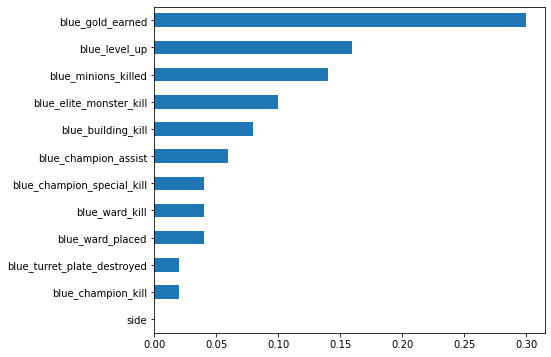

In [ ]:
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)
score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
displayScore(classifier,X_train,X_test,y_train,y_test,score)

classifier.feature_importances_

feature_importances = pd.Series(classifier.feature_importances_, index = dataset2["feature_names"])
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6));

cross val score: 0.72

train score: 0.75
test score: 0.71



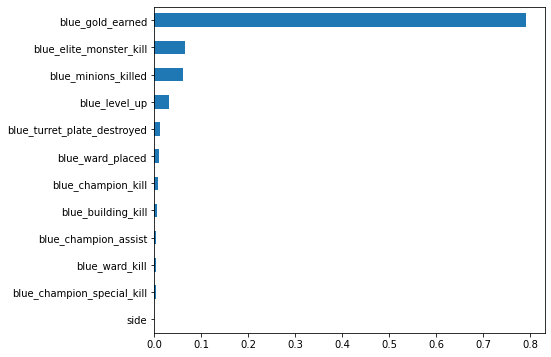

In [ ]:
classifier = DecisionTreeClassifier(max_depth=5)
classifier.fit(X_train, y_train)
score = cross_val_score(classifier, X_train, y_train, cv=5).mean()
displayScore(classifier,X_train,X_test,y_train,y_test,score)

classifier.feature_importances_

feature_importances = pd.Series(classifier.feature_importances_, index = dataset2["feature_names"])
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6));

Testons maintenant les scores de ces modèles sur des matchs au rang de Master, Diamant et Gold. 

Pour information, voici la liste des rangs sur League of Legends (qui est aussi précisée dans le [rapport de collecte](https://drive.google.com/file/d/1WEGppliSnn6lEUfxOahC5wj_gpnqWWlr/view?usp=sharing))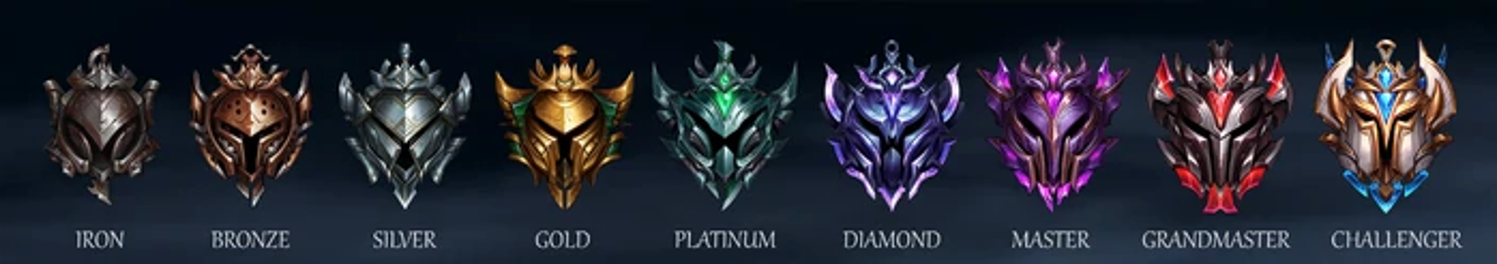

In [ ]:
df_data_gold = pd.read_csv(path+"TL_GI_360.csv", sep=";")
df_data_gold = df_data_gold[df_data_gold["minute"]<=nb_min]
print("TL_GI_360.csv read succesfuly")
df_target_gold = pd.read_csv(path+"W_GI_360.csv", sep=";")
print("W_GI_360.csv read succesfuly")


TL_GI_360.csv read succesfuly
W_GI_360.csv read succesfuly


In [ ]:
df_data_diamond = pd.read_csv(path+"TL_DI_374.csv", sep=";")
df_data_diamond = df_data_diamond[df_data_diamond["minute"]<=nb_min]
print("TL_DI_374.csv read succesfuly")
df_target_diamond = pd.read_csv(path+"W_DI_374.csv", sep=";")
print("W_DI_374.csv read succesfuly")

TL_DI_374.csv read succesfuly
W_DI_374.csv read succesfuly


In [ ]:
df_data_master = pd.read_csv(path+"TL_M_375.csv", sep=";")
df_data_master = df_data_master[df_data_master["minute"]<=nb_min]
print("TL_M_375.csv read succesfuly")
df_target_master = pd.read_csv(path+"W_M_375.csv", sep=";")
print("W_M_375.csv read succesfuly")

TL_M_375.csv read succesfuly
W_M_375.csv read succesfuly


In [ ]:
def genereate_df(df_data,df_target):
  df_data_grouped = df_data.groupby(["_id"], as_index=False).sum()

  n = len(df_data_grouped)
  blue_data = np.concatenate((np.array([0]*n).reshape(n, 1),np.delete(np.array(df_data_grouped)[:,:14], (1,2), 1)), axis=1)
  red_data = np.concatenate((np.array([1]*n).reshape(n, 1), np.array(df_data_grouped)[:,0].reshape(n, 1),np.array(df_data_grouped)[:,14:]), axis=1)

  dataset2 = {}
  dataset2["data"] = np.concatenate((blue_data, red_data), axis=0)

  L = []
  with alive_bar(len(dataset2["data"]),force_tty=True,bar="classic2",spinner=None) as bar:
    for data in np.array(dataset2["data"]):
        if(len(df_target[df_target["id"] == data[1]]["winner"])):
          if data[0]==0:
            L.append(int(df_target[df_target["id"] == data[1]]["winner"] == "red"))
            bar()
          elif data[0]==1:
            L.append(int(df_target[df_target["id"] == data[1]]["winner"] == "blue"))
            bar()
        else:
            L.append(-1)                # -1 = match pas trouvÃ©

  dataset2["target"] = np.array(L)
  dataset2["frame"] = None
  dataset2["target_names"] = ["blue_win", "red_win"]
  dataset2["DESCR"] = ""
  dataset2["feature_names"] = np.array(['side','blue_ward_placed',\
          'blue_ward_kill', 'blue_level_up', 'blue_champion_kill',\
          'blue_champion_assist', 'blue_champion_special_kill',\
          'blue_elite_monster_kill', 'blue_building_kill',\
          'blue_turret_plate_destroyed', 'blue_gold_earned',\
          'blue_minions_killed'])
  return dataset2

In [ ]:
dataset_gold = genereate_df(df_data_gold,df_target_gold)

[########################################] 720/720 [100%] in 0.6s (1219.29/s)                                                                              


In [ ]:
dataset_diamond = genereate_df(df_data_diamond,df_target_diamond)

[########################################] 748/748 [100%] in 0.5s (1396.59/s)                                                                              


In [ ]:
dataset_master = genereate_df(df_data_master,df_target_master)

[########################################] 750/750 [100%] in 0.6s (1358.95/s)                                                                              


In [ ]:
X_train2, X_test, y_train2, y_test = train_test_split(dataset_gold["data"], dataset_gold["target"], test_size=1)

X_train = np.delete(X_train, 1, 1)
X_test = np.delete(X_test, 1, 1)

comparaison(X_train,X_test,y_train,y_test)

In [ ]:
X_train2, X_test, y_train2, y_test = train_test_split(df_data_diamond["data"], df_data_diamond["target"], test_size=1)

X_train = np.delete(X_train, 1, 1)
X_test = np.delete(X_test, 1, 1)

comparaison(X_train,X_test,y_train,y_test)

In [ ]:
X_train2, X_test, y_train2, y_test = train_test_split(dataset_master["data"], dataset_master["target"], test_size=1)

X_train = np.delete(X_train, 1, 1)
X_test = np.delete(X_test, 1, 1)

comparaison(X_train,X_test,y_train,y_test)

Nous obtenons des résultats plutôt cohérent pour master mais moins pour les rang plus bas.
Il est donc difficile de généraliser les résultats que l'on a récupéré sur la population de challengers.

Cependant, nous avions des résultats avoisinant les 70% de score sur certains modèles pour l'étude des Challenger sur les données de test. Nous pouvons conclure que les 10 premières minutes sont importantes afin de maximiser les chances de victoire et que la meta shutdown est donc peu présente.

Nous avons aussi déterminé que les facteurs les plus importants sont les gold et les minions tués.